In [ ]:
# PCA on the whole training dataset with both classes
# https://stats.stackexchange.com/questions/7111/how-to-perform-pca-for-data-of-very-high-dimensionality
import numpy as np
import os
from PIL import Image
import helper
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# width size
w = 512

# height size
h = 512

# number of channels
c = 3


imSize = w * h * c
noImage = 750

In [11]:
print(f"------------------------PCA via covariance matrix-------------------------------")
# read X from folder
X = np.zeros((w * h * c, noImage))

source_train_normal = "./../../../datasets/rosacea-detection/train/normal"
source_train_rosacea = "./../../../datasets/rosacea-detection/train/rosacea"

print("Loading normal faces to X ...")
for i, filename in zip(range(500), os.listdir(source_train_normal)):
    filepath = os.path.join(source_train_normal, filename)
    img = Image.open(filepath)
    X[:, i] = (np.array(img) / 255.0).flatten().copy()
print(f"normal faces loaded.")

print("Loading rosacea faces to X ...")
for i, filename in zip(range(500, 750, 1), os.listdir(source_train_rosacea)):
    filepath = os.path.join(source_train_rosacea, filename)
    img = Image.open(filepath)
    X[:, i] = (np.array(img) / 255.0).flatten().copy()
print(f"rosacea faces loaded.")

------------------------PCA via covariance matrix-------------------------------
Loading normal faces to X ...
normal faces loaded.
Loading rosacea faces to X ...
rosacea faces loaded.


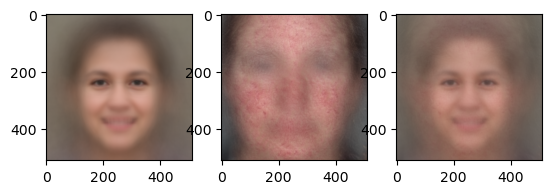

In [12]:
# Mean Vector
meanNormal = np.mean(X[:,:500], 1)
meanRosacea = np.mean(X[:, 500:], 1)
meanFace = np.mean(X, 1)

fig, axs = plt.subplots(1,3)
axs[0].imshow(np.reshape(meanNormal, (w, h, c)))
axs[1].imshow(np.reshape(meanRosacea, (w, h, c)))
axs[2].imshow(np.reshape(meanFace, (w, h, c)))

In [13]:
# center data matrix
for i in range(noImage):
    X[:, i] = X[:, i] - meanFace

In [14]:
# find out the rank of the data matrix
print(f"The rank of the data matrix is: {np.linalg.matrix_rank(X)}")

The rank of the data matrix is: 749


In [16]:
# step 1 : eig, mxm
eVals, eVects = np.linalg.eig(np.matmul(np.transpose(X), X) / (noImage - 1))

In [17]:
# eigenvectors are orthogonal and normalized
print(np.shape(eVals))
print(np.shape(eVects))
print(np.matmul(eVects, np.transpose(eVects)))

(750,)
(750, 750)
[[ 1.00000000e+00 -9.24858089e-14 -3.06294330e-14 ... -1.71038741e-13
   5.55655070e-14 -1.33175013e-13]
 [-9.24858089e-14  1.00000000e+00  5.91870303e-14 ... -4.03768273e-14
  -3.31350751e-13 -1.50773979e-13]
 [-3.06294330e-14  5.91870303e-14  1.00000000e+00 ...  8.02916761e-14
   2.43114990e-13  4.21711277e-15]
 ...
 [-1.71038741e-13 -4.03768273e-14  8.02916761e-14 ...  1.00000000e+00
   4.73013555e-14  2.85093130e-14]
 [ 5.55655070e-14 -3.31350751e-13  2.43114990e-13 ...  4.73013555e-14
   1.00000000e+00  4.99791181e-14]
 [-1.33175013e-13 -1.50773979e-13  4.21711277e-15 ...  2.85093130e-14
   4.99791181e-14  1.00000000e+00]]


In [18]:
# Step 2 : eig. nxn;
# Eigenvectors or Eigenfaces
Evect = np.matmul(X, eVects)


In [19]:
print(np.linalg.norm(Evect[:,0]))

2356.6274350666317


In [20]:
# Step 3 : normalization
Evect_norm = np.zeros((imSize, noImage))
for i in range(noImage):
    Evect_norm[:, i] = Evect[:, i] / np.linalg.norm(Evect[:,i])

In [21]:
print(np.linalg.norm(Evect_norm[:,0]))

0.9999999999999998


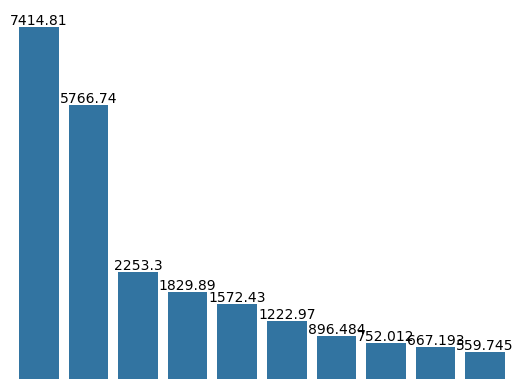

In [22]:
# display the first 10 EigenValues
# print(eVals)
ax = sns.barplot(x = np.arange(10), y = eVals[:10])
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.show()

------------------------PCA for image Compression-------------------------------


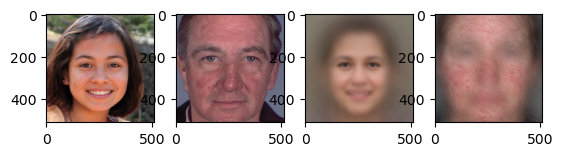

In [23]:
print(f"------------------------PCA for image Compression-------------------------------")
fig, axs = plt.subplots(1,4)
axs[0].imshow(np.reshape(X[:,0] + meanFace, (w, h, c)))
axs[1].imshow(np.reshape(X[:,500] + meanFace, (w, h, c)))
axs[2].imshow(np.reshape(meanNormal, (w,h,c)))
axs[3].imshow(np.reshape(meanRosacea, (w,h,c)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10483027877219425..1.0581612485236613].


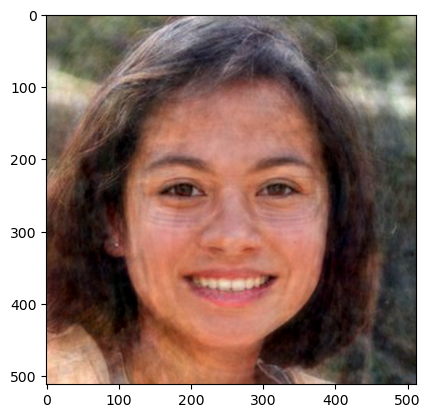

In [24]:
# recover the image
image1 = X[:,0]
noFeatures = 300
numbers2store = np.matmul(np.transpose(Evect_norm[:,: noFeatures]), image1)
image1_recover = np.matmul(Evect_norm[:,:noFeatures], numbers2store) + meanFace
plt.imshow(np.reshape(image1_recover, (w,h,c)))


In [27]:
# def project_(sample, n_features):
#     noFeatures = n_features
#     return np.matmul(Evect_norm[:,:noFeatures],
#                      np.matmul(np.transpose(Evect_norm[:,:noFeatures]), sample))
def project_(sample, n_features):
    noFeatures = n_features
    return np.matmul(np.transpose(Evect_norm[:,:noFeatures]), sample)

In [28]:
# On Test Set
# Test
TP, TN, FP, FN = 0, 0, 0, 0
test_normal_path = "./../../../datasets/rosacea-detection/test/normal"
count = 0

meanNormalProjected = project_(meanNormal,500)
meanRosaceaProjected = project_(meanRosacea, 500)
# ReducedMeanFaceNormal = project_(MeanFaceNormal, 'n', 100)
# ReducedMeanFaceRosacea = project_(MeanFaceRosacea, 'r' , 100)
for filename in os.listdir(test_normal_path):
    count += 1
    file_path = os.path.join(test_normal_path, filename)
    sample = np.array(Image.open(file_path)) / 255.0
    d_n = helper.cal_e_distance(meanNormalProjected, project_(sample.flatten(), 500))
    d_r= helper.cal_e_distance(meanRosaceaProjected, project_(sample.flatten(), 500))
    if d_n < d_r:
        TN += 1
        print(f"d_n:{d_n} < d_r:{d_r}, {count}th in normal is true negative")

    else: # d_n > d_r
        FP += 1 
        print(f"d_n:{d_n} > d_r:{d_r}, {count}th in normal is false positive")
print(f"Test on normal done, True Negative:{TN}, False Positive:{FP}\n")


count = 0
test_rosacea_path = "./../../../datasets/rosacea-detection/test/rosacea"
for filename in os.listdir(test_rosacea_path):
    count += 1
    file_path = os.path.join(test_rosacea_path, filename)
    sample = np.array(Image.open(file_path)) /255.0

    d_n = helper.cal_e_distance(meanNormalProjected, project_(sample.flatten(),500))
    d_r= helper.cal_e_distance(meanRosaceaProjected, project_(sample.flatten(),500))
    if d_n > d_r:
        TP += 1
        print(f"d_n:{d_n} > d_r:{d_r}, {count}th in rosacea is true positive")
    else: # d_n < d_r
        FN += 1
        print(f"d_n:{d_n} < d_r:{d_r}, {count}th in rosacea is false negative")
print(f"Test on rosacea done, True Positive:{TP}, False Negative:{FN}")

print(TP,TN,FP,FN)
test_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"TP:{TP}, TN:{TN}, FP:{FP}, FN:{FN}")
print(f"Test accuray:{test_accuracy}")

d_n:55010.22712274674 < d_r:101759.75734226855, 1th in normal is true negative
d_n:48225.20426125274 > d_r:42922.460293083415, 2th in normal is false positive
d_n:75246.88806157884 < d_r:90108.97838828097, 3th in normal is true negative
d_n:63957.44363298324 < d_r:102627.71311155034, 4th in normal is true negative
d_n:41000.37689259333 < d_r:64908.626562944286, 5th in normal is true negative
d_n:32180.317571797543 < d_r:51622.39136577785, 6th in normal is true negative
d_n:53207.08166809265 < d_r:71536.99785178511, 7th in normal is true negative
d_n:34119.883594965926 < d_r:63476.001753180295, 8th in normal is true negative
d_n:54721.112529845945 < d_r:78631.24507558068, 9th in normal is true negative
d_n:30636.298951682216 < d_r:46701.973364892765, 10th in normal is true negative
d_n:43282.8882787462 < d_r:84381.18879039468, 11th in normal is true negative
d_n:53267.024430017766 < d_r:98330.91409343675, 12th in normal is true negative
d_n:30621.905657436448 < d_r:47270.77114136661, 13

In [ ]:
helper.get_performance_metrics(TP,TN,FP,FN)

(0.925, 0.8723404255319149, 0.82, 0.8453608247422681)